In [1]:
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib

In [2]:
data = pd.read_csv("../data/raw/dataset.csv")

In [3]:
data.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
data.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [5]:
data.shape

(1781, 21)

In [6]:
data.WHOIS_STATEPRO.unique()

array([nan, 'AK', 'TX', 'Mahe', 'CO', 'FL', 'Kansas',
       'Novosibirskaya obl.', 'CA', 'Tennessee', 'Vi', 'OR', 'Texas',
       'ALBERTA', 'PANAMA', 'Arizona', 'WI', 'Oregon', 'Andhra Pradesh',
       'AB', 'Tamil Nadu', 'VA', 'NY', 'quebec', 'MA', 'ON', 'New Mexico',
       'British Columbia', 'Massachusetts', 'California', 'bangkok',
       'WEST MIDLANDS', 'TEXAS', 'WC1N', 'Kentucky', 'MD', 'NEW YORK',
       'Washington', 'Colorado', 'PA', 'LA', 'WA', 'Queensland', 'MOSCOW',
       'UK', 'P', 'NH', 'Pennsylvania', 'UTTAR PRADESH', 'NC', 'kireka',
       'IL', 'Missouri', 'Osaka', 'QC', 'Michigan', 'Maryland', 'Ontario',
       'South Carolina', 'Zhejiang', 'New York', 'QLD', 'NJ', 'GA', 'MO',
       'HR', 'ab', 'Greater London', 'Illinois', '--', 'Fukuoka', 'BC',
       'AL', 'Krasnoyarsk', 'MAINE', 'Virginia', 'MH', 'GRAND CAYMAN',
       'Austria', 'DE', 'shandong', 'AZ', 'PRAHA', 'beijingshi',
       'liaoningsheng', 'North Carolina', 'OH', 'Manila', 'Utah', 'MI',
       'NSW

In [7]:
data.DNS_QUERY_TIMES.mean()

2.263483146067416

In [8]:
data.loc[
    data.loc[:, "DNS_QUERY_TIMES"].isna(), "DNS_QUERY_TIMES"
] = data.DNS_QUERY_TIMES.mean()

In [9]:
data.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                0
Type                           0
dtype: int64

Base line

In [10]:
data.Type.mean()

0.12128017967434025

In [11]:
target_mode = [0] * data.shape[0]

In [12]:
len(target_mode)

1781

In [13]:
f1_score(y_true=data.loc[:, "Type"], y_pred=target_mode)

0.0

drop columns

In [14]:
f_data = data.drop(
    columns=["WHOIS_STATEPRO", "WHOIS_REGDATE", "WHOIS_UPDATED_DATE", "CONTENT_LENGTH"]
)

In [15]:
f_data.shape

(1781, 17)

In [16]:
f_data.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
WHOIS_COUNTRY                306
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                0
Type                           0
dtype: int64

In [17]:
data.CHARSET.value_counts()

CHARSET
UTF-8           676
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64

In [18]:
f_data.loc[:, "CHARSET"] = f_data["CHARSET"].str.capitalize()

In [19]:
f_data.CHARSET.value_counts()

CHARSET
Utf-8           1055
Iso-8859-1       561
Us-ascii         155
Windows-1251       1
Iso-8859           1
Windows-1252       1
Name: count, dtype: int64

In [20]:
f_data.loc[f_data.loc[:, "CHARSET"] == "Iso-8859", "CHARSET"] = "Iso-8859-1"

In [21]:
f_data.CHARSET.value_counts()

CHARSET
Utf-8           1055
Iso-8859-1       562
Us-ascii         155
Windows-1251       1
Windows-1252       1
Name: count, dtype: int64

In [22]:
f_data.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1781.000000,1781.000000
mean,56.961258,11.111735,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930029,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [23]:
f_data.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
WHOIS_COUNTRY                306
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                0
Type                           0
dtype: int64

In [24]:
f_data.loc[:, "SERVER"].value_counts()

SERVER
Apache                                                       386
nginx                                                        211
Microsoft-HTTPAPI/2.0                                        113
cloudflare-nginx                                              94
Microsoft-IIS/7.5                                             51
                                                            ... 
mw2103.codfw.wmnet                                             1
Apache/2.4.25 (Debian)                                         1
ECD (fll/0790)                                                 1
Apache/2.4.25 (FreeBSD) OpenSSL/1.0.1s-freebsd PHP/5.6.30      1
Apache/2.2.16 (Debian)                                         1
Name: count, Length: 238, dtype: int64

<Axes: xlabel='SERVER'>

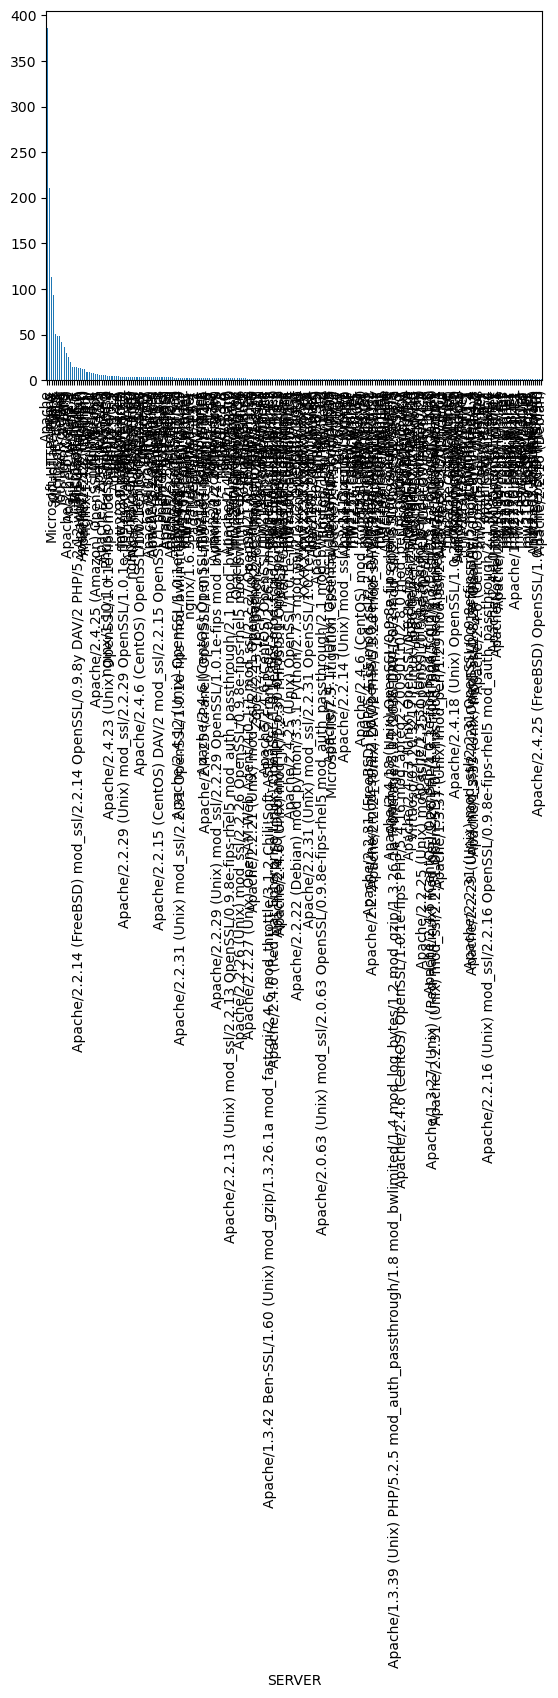

In [25]:
f_data.loc[:, "SERVER"].value_counts().plot.bar()

In [26]:
f_data = f_data.drop(columns="SERVER")

In [27]:
f_data.shape

(1781, 16)

In [28]:
f_data.loc[:, "WHOIS_COUNTRY"].value_counts()

WHOIS_COUNTRY
US                1103
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
CN                  10
IN                  10
FR                   9
CZ                   9
NL                   6
CH                   6
[u'GB'; u'UK']       5
KR                   5
PH                   4
BS                   4
ru                   4
AT                   4
HK                   3
us                   3
TR                   3
BE                   3
DE                   3
SC                   3
KY                   3
SE                   3
BR                   2
UY                   2
Cyprus               2
SI                   2
UA                   2
RU                   2
IL                   2
NO                   2
KG                   2
TH                   1
se                   1
LV                   1
LU                   1
United Kingdom       1
UG                  

In [29]:
f_data.loc[:, "WHOIS_COUNTRY"].unique().shape

(49,)

In [30]:
f_data.loc[:, "WHOIS_COUNTRY"] = f_data["WHOIS_COUNTRY"].str.capitalize()

In [31]:
f_data.loc[:, "WHOIS_COUNTRY"].value_counts()

WHOIS_COUNTRY
Us                1106
Ca                  84
Es                  63
Au                  35
Pa                  21
Gb                  19
Jp                  11
Uk                  10
Cn                  10
In                  10
Fr                   9
Cz                   9
Nl                   6
Ch                   6
Ru                   6
[u'gb'; u'uk']       5
Kr                   5
Bs                   4
Se                   4
At                   4
Ph                   4
Be                   3
Hk                   3
Tr                   3
De                   3
Ky                   3
Sc                   3
No                   2
Si                   2
Uy                   2
Cyprus               2
Ua                   2
Kg                   2
Il                   2
Br                   2
Lu                   1
Ug                   1
Pk                   1
It                   1
Th                   1
By                   1
Ae                   1
Ie                  

In [32]:
f_data.loc[:, "WHOIS_COUNTRY"].unique().shape

(46,)

In [33]:
f_data.loc[f_data.loc[:, "WHOIS_COUNTRY"] == "[u'gb'; u'uk']", "WHOIS_COUNTRY"] = "Uk"

In [34]:
f_data.loc[:, "WHOIS_COUNTRY"].value_counts()

WHOIS_COUNTRY
Us                1106
Ca                  84
Es                  63
Au                  35
Pa                  21
Gb                  19
Uk                  15
Jp                  11
Cn                  10
In                  10
Fr                   9
Cz                   9
Ch                   6
Nl                   6
Ru                   6
Kr                   5
At                   4
Bs                   4
Ph                   4
Se                   4
Ky                   3
Tr                   3
De                   3
Hk                   3
Sc                   3
Be                   3
No                   2
Ua                   2
Uy                   2
Cyprus               2
Si                   2
Kg                   2
Il                   2
Br                   2
Lu                   1
Th                   1
Pk                   1
It                   1
Ug                   1
By                   1
Ae                   1
Ie                   1
Lv                  

In [35]:
f_data.loc[f_data.loc[:, "WHOIS_COUNTRY"] == "United kingdom", "WHOIS_COUNTRY"] = "Uk"

In [36]:
f_data.loc[:, "WHOIS_COUNTRY"].value_counts()

WHOIS_COUNTRY
Us        1106
Ca          84
Es          63
Au          35
Pa          21
Gb          19
Uk          16
Jp          11
Cn          10
In          10
Fr           9
Cz           9
Ru           6
Ch           6
Nl           6
Kr           5
Ph           4
At           4
Bs           4
Se           4
Ky           3
Sc           3
Be           3
Tr           3
Hk           3
De           3
Cyprus       2
Ua           2
Uy           2
Kg           2
Br           2
No           2
Il           2
Si           2
Lv           1
Pk           1
It           1
Lu           1
By           1
Ae           1
Ie           1
Ug           1
Th           1
Name: count, dtype: int64

In [37]:
f_data.loc[f_data.loc[:, "WHOIS_COUNTRY"].isna(), "WHOIS_COUNTRY"] = "Not_available"

In [38]:
f_data.loc[:, "WHOIS_COUNTRY"].value_counts()

WHOIS_COUNTRY
Us               1106
Not_available     306
Ca                 84
Es                 63
Au                 35
Pa                 21
Gb                 19
Uk                 16
Jp                 11
Cn                 10
In                 10
Fr                  9
Cz                  9
Nl                  6
Ch                  6
Ru                  6
Kr                  5
At                  4
Se                  4
Bs                  4
Ph                  4
Be                  3
Hk                  3
Tr                  3
De                  3
Ky                  3
Sc                  3
Ua                  2
Cyprus              2
Uy                  2
Kg                  2
Br                  2
No                  2
Il                  2
Si                  2
Lv                  1
Pk                  1
It                  1
Lu                  1
By                  1
Ae                  1
Ie                  1
Ug                  1
Th                  1
Name: count, dtype

In [39]:
f_data.isna().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      7
WHOIS_COUNTRY                0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [40]:
f_data = f_data.loc[~(f_data.loc[:, "CHARSET"].isna()), :]

In [41]:
f_data.isna().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
WHOIS_COUNTRY                0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [42]:
f_data.to_csv("../data/interim/first_data_clean.csv", index=False)